# Oil production

In [1]:
# DATA MANIPULATION, Visualization, and stats
import pandas as pd
from glob import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Your current working directory should be ./mattwagon/oil_production_prediction/notebooks
os.getcwd()

'/Users/eduardomonteiro/code/mattwagon/oil_production_prediction/notebooks'

## Import the data

In [3]:
# This filepath should work for all of us
# I have added 'raw_data' to .gitignore so it should never be pushed to the repo
path = os.path.join('..', 'raw_data')
file_names = os.listdir(path)
csv_files = [f for f in file_names if f.endswith('.csv')]

csv_files.sort()

df = pd.DataFrame()

for file in csv_files:
    file_path = os.path.join(path, file)
    df_aux = pd.read_csv(file_path)
    df = pd.concat([df, df_aux], ignore_index=True)

In [4]:
df.head()

,Date,Calculated Drawdown_At Gauge,Calculated Drawdown_At Bottom Node,Reservoir Pressure,z Well Identifier,z TMore PS Identifier,z TMore Identifier,z Tag Identifier 2,z Tag Identifier,z PI-AF Database,...,Annulus Master Valve Status,Annulus Master Valve Opening Frequency,Pseudo Cv,GL GOR,GL Qgas,GL Qliq,GL Qoil,GL Qwat,GL Ramp-up Speed,GL WCT
0,2007-02-01 00:00:00+01:00,NaN,NaN,186.34,30221,NaN,NaN,1,3022,NaN,...,NaN,NaN,NaN,52.5,90.0,32300.0,10960.0,21360.0,NaN,66.08
1,2007-02-02 00:00:00+01:00,NaN,NaN,186.34,30221,NaN,NaN,1,3022,NaN,...,NaN,NaN,NaN,52.5,90.0,32300.0,10960.0,21360.0,NaN,66.08
2,2007-02-03 00:00:00+01:00,NaN,NaN,186.34,30221,NaN,NaN,1,3022,NaN,...,NaN,NaN,NaN,52.5,90.0,32300.0,10960.0,21360.0,NaN,66.08
3,2007-02-04 00:00:00+01:00,NaN,NaN,186.34,30221,NaN,NaN,1,3022,NaN,...,NaN,NaN,NaN,52.5,90.0,32300.0,10960.0,21360.0,NaN,66.08
4,2007-02-05 00:00:00+01:00,NaN,NaN,186.34,30221,NaN,NaN,1,3022,NaN,...,NaN,NaN,NaN,52.5,90.0,32300.0,10960.0,21360.0,NaN,66.08


In [5]:
df.shape

(5813, 189)

In [6]:
df.dtypes.Date

dtype('O')

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].dtype
df.Date[0]

Timestamp('2007-02-01 00:00:00+0100', tz='pytz.FixedOffset(60)')

In [8]:
# Removes the timezone aspect which makes the column easier to read but changes the date
df['Date'] = df['Date'].dt.tz_convert(None)
df['Date'].dtype
df.Date[0]

Timestamp('2007-01-31 23:00:00')

In [9]:
df.head()

,Date,Calculated Drawdown_At Gauge,Calculated Drawdown_At Bottom Node,Reservoir Pressure,z Well Identifier,z TMore PS Identifier,z TMore Identifier,z Tag Identifier 2,z Tag Identifier,z PI-AF Database,...,Annulus Master Valve Status,Annulus Master Valve Opening Frequency,Pseudo Cv,GL GOR,GL Qgas,GL Qliq,GL Qoil,GL Qwat,GL Ramp-up Speed,GL WCT
0,2007-01-31 23:00:00,NaN,NaN,186.34,30221,NaN,NaN,1,3022,NaN,...,NaN,NaN,NaN,52.5,90.0,32300.0,10960.0,21360.0,NaN,66.08
1,2007-02-01 23:00:00,NaN,NaN,186.34,30221,NaN,NaN,1,3022,NaN,...,NaN,NaN,NaN,52.5,90.0,32300.0,10960.0,21360.0,NaN,66.08
2,2007-02-02 23:00:00,NaN,NaN,186.34,30221,NaN,NaN,1,3022,NaN,...,NaN,NaN,NaN,52.5,90.0,32300.0,10960.0,21360.0,NaN,66.08
3,2007-02-03 23:00:00,NaN,NaN,186.34,30221,NaN,NaN,1,3022,NaN,...,NaN,NaN,NaN,52.5,90.0,32300.0,10960.0,21360.0,NaN,66.08
4,2007-02-04 23:00:00,NaN,NaN,186.34,30221,NaN,NaN,1,3022,NaN,...,NaN,NaN,NaN,52.5,90.0,32300.0,10960.0,21360.0,NaN,66.08


## Data cleaning

### Drop features with all NaN and >30% NaN values

Drop features with all NaN values

In [10]:
df = df.dropna(how='all', axis='columns')
df.shape

(5813, 131)

Drop features with > 30% NaN values

In [11]:
sorted_nan = df.isnull().sum().sort_values(ascending=False)
sorted_nan

Test Downhole Gauge P           5686
Test Qliq Vol                   5686
Test Qgas Vol                   5686
Test Qgas                       5686
Test Productivity Index         5686
                                ... 
MPFM CF Liq                        0
MPFM CF GOR                        0
Downhole Gauge Status              0
Downhole Gauge Depth TVD MSL       0
GL WCT                             0
Length: 131, dtype: int64

In [12]:
features_drop = []
dic = {}
for feature, value in dict(sorted_nan).items():
    if value/len(df) > 0.3:
        features_drop.append(feature)
        
df.drop(columns=features_drop, inplace=True)

In [13]:
df.shape

(5813, 65)

In [14]:
df.head(5)

,Date,Reservoir Pressure,z Well Identifier,z Tag Identifier 2,z Tag Identifier,WHT,WHP,Well Head Elevation,Water Density,Tubing Gradient,...,Choke Calculated,Bottomhole Reference Depth TVD MSL,Bottomhole Reference Depth MD MSL,Annulus P,GL GOR,GL Qgas,GL Qliq,GL Qoil,GL Qwat,GL WCT
0,2007-01-31 23:00:00,186.34,30221,1,3022,NaN,NaN,1264.6,1.041,0.0,...,NaN,2165.7,2454.8,NaN,52.5,90.0,32300.0,10960.0,21360.0,66.08
1,2007-02-01 23:00:00,186.34,30221,1,3022,NaN,NaN,1264.6,1.041,0.0,...,NaN,2165.7,2454.8,NaN,52.5,90.0,32300.0,10960.0,21360.0,66.08
2,2007-02-02 23:00:00,186.34,30221,1,3022,NaN,NaN,1264.6,1.041,0.0,...,NaN,2165.7,2454.8,NaN,52.5,90.0,32300.0,10960.0,21360.0,66.08
3,2007-02-03 23:00:00,186.34,30221,1,3022,NaN,NaN,1264.6,1.041,0.0,...,NaN,2165.7,2454.8,NaN,52.5,90.0,32300.0,10960.0,21360.0,66.08
4,2007-02-04 23:00:00,186.34,30221,1,3022,NaN,NaN,1264.6,1.041,0.0,...,NaN,2165.7,2454.8,NaN,52.5,90.0,32300.0,10960.0,21360.0,66.08


### Drop features with std = 0

In [15]:
features_null_std = []

for feature in df.drop(columns='Date').columns:
    if df[feature].std() < 0.0000001:
        features_null_std.append(feature)
        
features_null_std

['Reservoir Pressure',
 'z Well Identifier',
 'z Tag Identifier 2',
 'z Tag Identifier',
 'Well Head Elevation',
 'Water Density',
 'Qoil Target',
 'Qoil Choke Method',
 'Qliq Choke Method',
 'MPFM Status',
 'MPFM CF WCT',
 'MPFM CF Liq',
 'Downhole Gauge Status',
 'Downhole Gauge Depth TVD MSL',
 'Downhole Gauge Depth MD MSL',
 'Control Target',
 'Bottomhole Reference Depth TVD MSL',
 'Bottomhole Reference Depth MD MSL',
 'GL GOR',
 'GL Qgas',
 'GL Qliq',
 'GL Qoil',
 'GL Qwat',
 'GL WCT']

In [16]:
df.drop(columns=features_null_std, inplace=True)
df.shape

(5813, 41)

## Select features to impute

Let's take a look at features with less than 30% NaN

In [17]:
features_to_impute_check = []

for feature, value in dict(sorted_nan).items():
    if value/len(df) > 0 and value/len(df) < 0.3:
        features_to_impute_check.append(feature)

In [18]:
remove = {"Sand Rate", "MPFM NTotal Count Rate", "MPFM N81 Count Rate", "MPFM N356 Count Rate", "MPFM N32 Count Rate", "MPFM GOR", "Downhole Gauge T", "Downhole Gauge P"}
 
features_to_impute = [f for f in features_to_impute_check if f not in remove]
len(features_to_impute)

25

In [19]:
df.drop(columns=remove, inplace=True)

In [20]:
df_to_impute = df[df.columns.intersection(features_to_impute)]

In [21]:
df_to_impute.head(5)

,WHT,WHP,Service Line P,Sand Raw,Qwat MPFM corrected,Qwat MPFM,Qoil MPFM corrected,Qoil MPFM,Qliq MPFM corrected,Qliq MPFM,...,Manifold T,Manifold P,Jumper T,Choke Opening Calc2,Choke Opening Calc1,Choke Opening,Choke Measured,Choke CCR,Choke Calculated,Annulus P
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df_to_impute.describe()

,WHT,WHP,Service Line P,Sand Raw,Qwat MPFM corrected,Qwat MPFM,Qoil MPFM corrected,Qoil MPFM,Qliq MPFM corrected,Qliq MPFM,...,Manifold T,Manifold P,Jumper T,Choke Opening Calc2,Choke Opening Calc1,Choke Opening,Choke Measured,Choke CCR,Choke Calculated,Annulus P
count,5642.000000,5228.000000,5521.000000,5747.000000,5664.000000,5642.000000,5664.000000,5633.000000,5664.000000,5628.000000,...,5128.000000,5782.000000,4835.000000,5785.000000,5780.000000,5753.000000,5753.000000,5785.000000,5780.000000,5751.000000
mean,48.831748,82.685001,124.365437,5434.123375,10354.114095,10422.348374,15589.131906,15706.773138,25943.246002,26133.836456,...,48.723259,67.082424,47.728970,75.994536,75.990730,76.907927,76.907927,75.994536,75.990730,139.652154
std,8.227372,19.358646,32.454476,879.564456,6611.698415,6573.008235,9030.323334,8955.454985,8292.619083,8013.385746,...,9.986042,13.047429,8.744576,20.610524,20.513595,19.849258,19.849258,20.610524,20.513595,24.360330
min,2.044475,1.013250,58.107376,2744.435303,-11.831733,-11.831733,0.000000,0.000000,0.000000,0.000000,...,-1.088101,1.000000,-8.794330,0.000000,0.000000,-0.251513,-0.251513,0.000000,0.000000,18.328125
25%,49.698901,72.185286,105.313896,4847.917725,3291.518388,3417.593842,9691.354946,9731.330410,22872.243590,22998.066174,...,49.200542,64.776993,48.669762,69.500000,69.902908,71.024460,71.024460,69.500000,69.902908,114.920982
50%,51.247467,78.146263,109.413887,5084.182129,12935.184728,12960.072938,13932.108410,14065.431937,26524.630513,26572.039040,...,51.940947,69.046879,51.085567,76.000000,76.213593,76.917267,76.917267,76.000000,76.213593,150.246353
75%,51.716765,83.912359,129.247482,5785.894531,15590.195567,15601.058678,18567.139606,18599.235723,31155.054050,31173.918848,...,53.746908,72.578142,51.790573,88.000000,87.864075,89.496338,89.496338,88.000000,87.864075,157.888649
max,52.393002,216.446396,272.471619,12071.355469,25903.980632,25903.980632,49223.595339,49223.595339,49676.388581,49676.388581,...,54.276535,140.115250,52.241966,100.300003,100.000000,101.011047,101.011047,100.300003,100.000000,168.035065


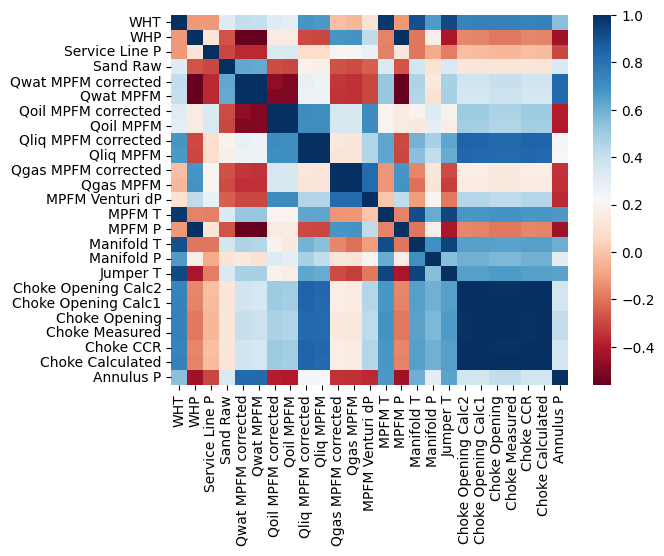

In [23]:
# Pairwise correlation
sns.heatmap(df_to_impute.corr(), cmap='RdBu')
plt.show()

A lot of the 'Choke' features seem to be duplicates of each other or at least extremely similar

Qwat and Annulus P features show strong negative correlation towards our target feature

Let's look into the choke features

In [24]:
# Get list of choke features
choke_cols = [col for col in df_to_impute.columns if 'Choke' in col]
choke_cols

['Choke Opening Calc2',
 'Choke Opening Calc1',
 'Choke Opening',
 'Choke Measured',
 'Choke CCR',
 'Choke Calculated']

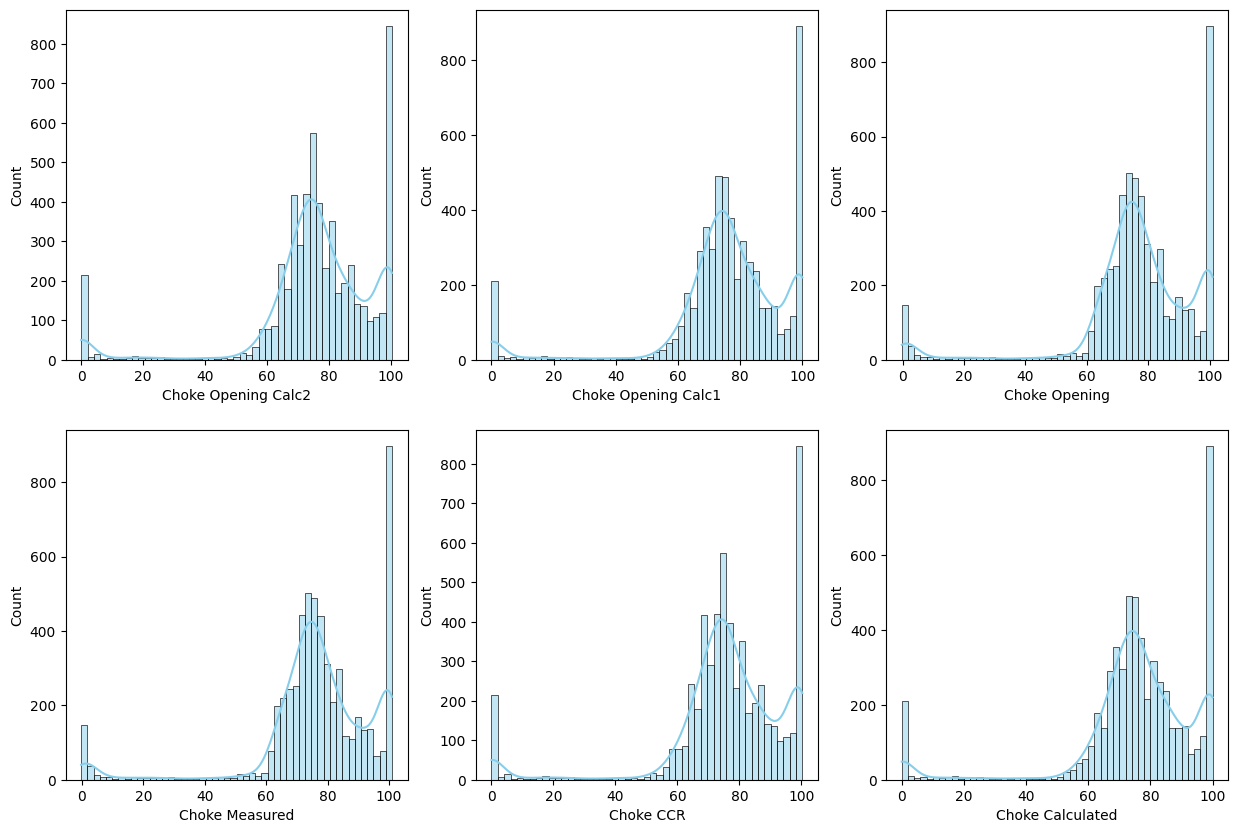

In [25]:
# Visual look at distribution of choke data to check for any notable differences
f, axes = plt.subplots(2, 3, figsize=(15, 10))
for ax, feature in zip(axes.flat, df_to_impute[choke_cols]):
    sns.histplot(df_to_impute[feature] , color="skyblue", kde=True, ax=ax)

The features look like pairs (Choke Opening calc 1 - Choke Calculated), (Choke Opening - Choke Measured) and (Choke CCR - Choke Opening Calc 2)

We should drop one of each pair to avoid multicollinearity

In [26]:
choke_features_drop = ['Choke Opening Calc1', 'Choke Opening Calc2', 'Choke Measured', 'Choke Calculated', 'Choke CCR']
df.drop(columns=choke_features_drop, inplace = True)
df_to_impute.drop(columns=choke_features_drop, inplace = True)

/var/folders/25/mbstknkd5kn2fd3pcw0r9n4w0000gn/T/ipykernel_4301/350798590.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_impute.drop(columns=choke_features_drop, inplace = True)


In [27]:
corrected_features_drop = ['Qwat MPFM corrected', 'Qoil MPFM corrected', 'Qliq MPFM corrected', 'Qgas MPFM corrected']
df.drop(columns=corrected_features_drop, inplace=True)
df_to_impute.drop(columns=corrected_features_drop, inplace=True)

/var/folders/25/mbstknkd5kn2fd3pcw0r9n4w0000gn/T/ipykernel_4301/3367470404.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_impute.drop(columns=corrected_features_drop, inplace=True)


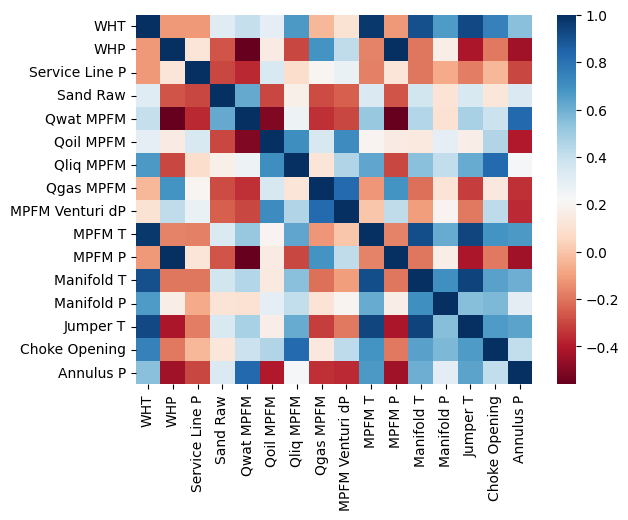

In [28]:
# Pairwise correlation
sns.heatmap(df_to_impute.corr(), cmap='RdBu')
plt.show()

## Impute features

In [29]:
df_to_impute.columns

Index(['WHT', 'WHP', 'Service Line P', 'Sand Raw', 'Qwat MPFM', 'Qoil MPFM',
       'Qliq MPFM', 'Qgas MPFM', 'MPFM Venturi dP', 'MPFM T', 'MPFM P',
       'Manifold T', 'Manifold P', 'Jumper T', 'Choke Opening', 'Annulus P'],
      dtype='object')

In [30]:
for feature in df_to_impute.columns:
    df[feature].replace(np.nan, df[feature].median(), inplace=True)

In [31]:
df.isnull().sum()

Date               0
WHT                0
WHP                0
Tubing Gradient    0
Tubing dP          0
Service Line P     0
Sand Raw           0
Qwat PC            0
Qwat MPFM          0
Qoil PC            0
Qoil MPFM          0
Qliq MPFM          0
Qgas PC            0
Qgas MPFM          0
MPFM WCT           0
MPFM Venturi dP    0
MPFM T             0
MPFM P             0
MPFM CF GOR        0
Manifold T         0
Manifold P         0
Jumper T           0
Choke Opening      0
Annulus P          0
dtype: int64

In [32]:
df.shape

(5813, 24)

## Feature selection

In [33]:
#converting the correlation matrix into a DataFrame
corr_df = df.corr().stack().reset_index()

#renaming the columns
corr_df.columns = ['feature_1', 'feature_2', 'correlation']

#remove 'self correlations'
no_self_correlation = (corr_df['feature_1'] != corr_df['feature_2'])
corr_df = corr_df[no_self_correlation]

/var/folders/25/mbstknkd5kn2fd3pcw0r9n4w0000gn/T/ipykernel_4301/2819890218.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df.corr().stack().reset_index()


In [34]:
#compute the absolute correlation
corr_df['absolute_correlation'] = np.abs(corr_df['correlation'])

#showing the top 5 most correlated pairs of feature
corr_df.sort_values(by='absolute_correlation', ascending = False).head(20)

,feature_1,feature_2,correlation,absolute_correlation
39,WHP,MPFM P,1.000000,1.000000
369,MPFM P,WHP,1.000000,1.000000
49,Tubing Gradient,Tubing dP,1.000000,1.000000
71,Tubing dP,Tubing Gradient,1.000000,1.000000
146,Qwat PC,Qoil PC,0.999963,0.999963
190,Qoil PC,Qwat PC,0.999963,0.999963
261,Qgas PC,Qoil PC,0.999912,0.999912
195,Qoil PC,Qgas PC,0.999912,0.999912
259,Qgas PC,Qwat PC,0.999798,0.999798
149,Qwat PC,Qgas PC,0.999798,0.999798


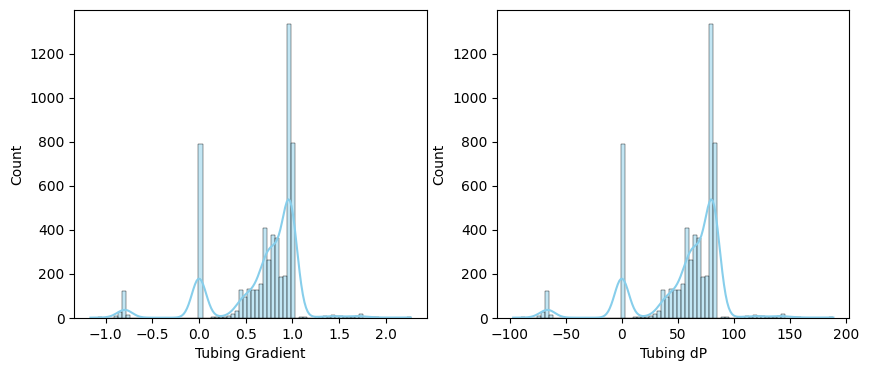

In [35]:
f, axes = plt.subplots(1, 2, figsize=(10, 4))
for ax, feature in zip(axes.flat, df[['Tubing Gradient', 'Tubing dP']]):
    sns.histplot(df[feature] , color="skyblue", kde=True, ax=ax)

In [36]:
features_drop_2 = ['Qwat PC', 'Qgas PC', 'Qoil PC', 'Tubing dP','MPFM P']
df.drop(columns=features_drop_2, inplace = True)

In [37]:
df.shape

(5813, 19)

## Scaling

Text(0.5, 1.0, 'Qoil MPFM from 2007 to 2022')

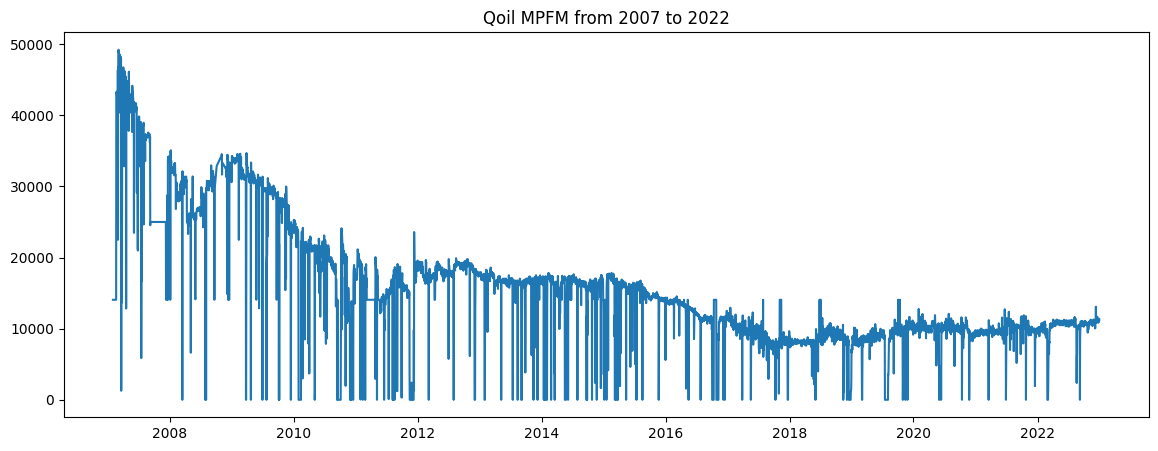

In [38]:
plt.figure(figsize=(14,5))
plt.plot(df['Date'], df['Qoil MPFM'])
plt.title('Qoil MPFM from 2007 to 2022')

Train data: from 2013 to 2015

Test data: from 2020 to 2022

In [52]:
train_start_date = pd.to_datetime('2012-12-31 23:00:00')
train_end_date = pd.to_datetime('2014-11-29 23:00:00')
val_start_date = pd.to_datetime('2014-11-30 23:00:00')
val_end_date = pd.to_datetime('2014-12-30 23:00:00')
test_start_date = pd.to_datetime('2019-12-31 23:00:00')
test_end_date = pd.to_datetime('2022-12-30 23:00:00')


df_train = df[(df['Date']>=train_start_date) & (df['Date']<=train_end_date)]
df_val = df[(df['Date']>=val_start_date) & (df['Date']<=val_end_date)]
df_test = df[(df['Date']>=test_start_date) & (df['Date']<=test_end_date)]

In [53]:
X = df.drop(columns=['Date', 'Qoil MPFM'])
y = df['Qoil MPFM']

X_train = df_train.drop(columns=['Date', 'Qoil MPFM'])
y_train = df_train['Qoil MPFM']

X_val = df_val.drop(columns=['Date', 'Qoil MPFM'])
y_val = df_val['Qoil MPFM']

X_test = df_test.drop(columns=['Date', 'Qoil MPFM'])
y_test = df_test['Qoil MPFM']

Text(0.5, 1.0, 'Qoil MPFM')

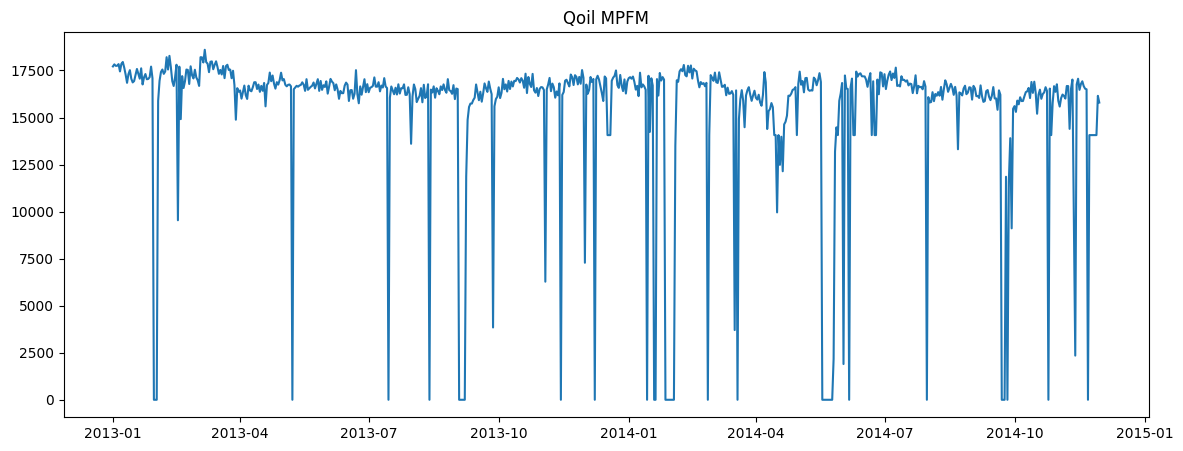

In [54]:
plt.figure(figsize=(14,5))
plt.plot(df_train['Date'], df_train['Qoil MPFM'])
plt.title('Qoil MPFM')

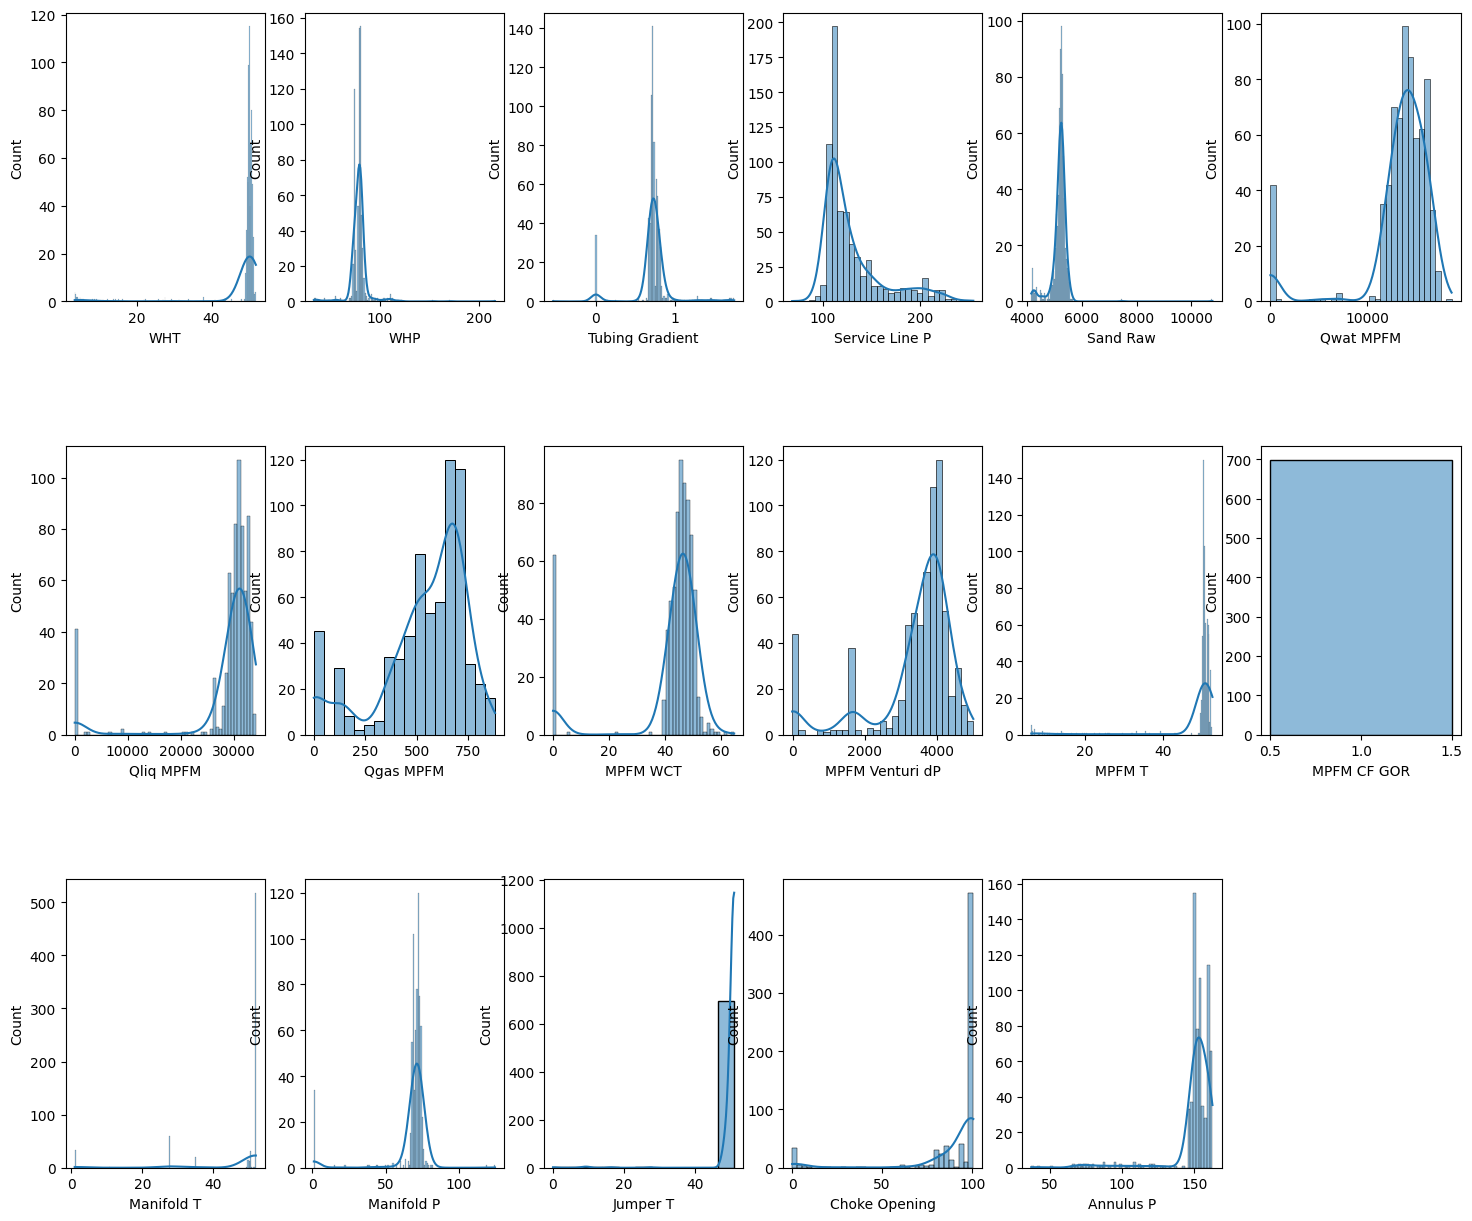

In [55]:
# Create a figure and axis for each histogram
fig, axs = plt.subplots(3, 6, figsize=(18, 15))

axs = axs.ravel()

for i, col in enumerate(X_train.columns):
    sns.histplot(X_train[col], kde=True, ax=axs[i])

for j in range(len(X_train.columns), len(axs)):
    axs[j].axis('off')

plt.subplots_adjust(hspace=0.5)

plt.show()

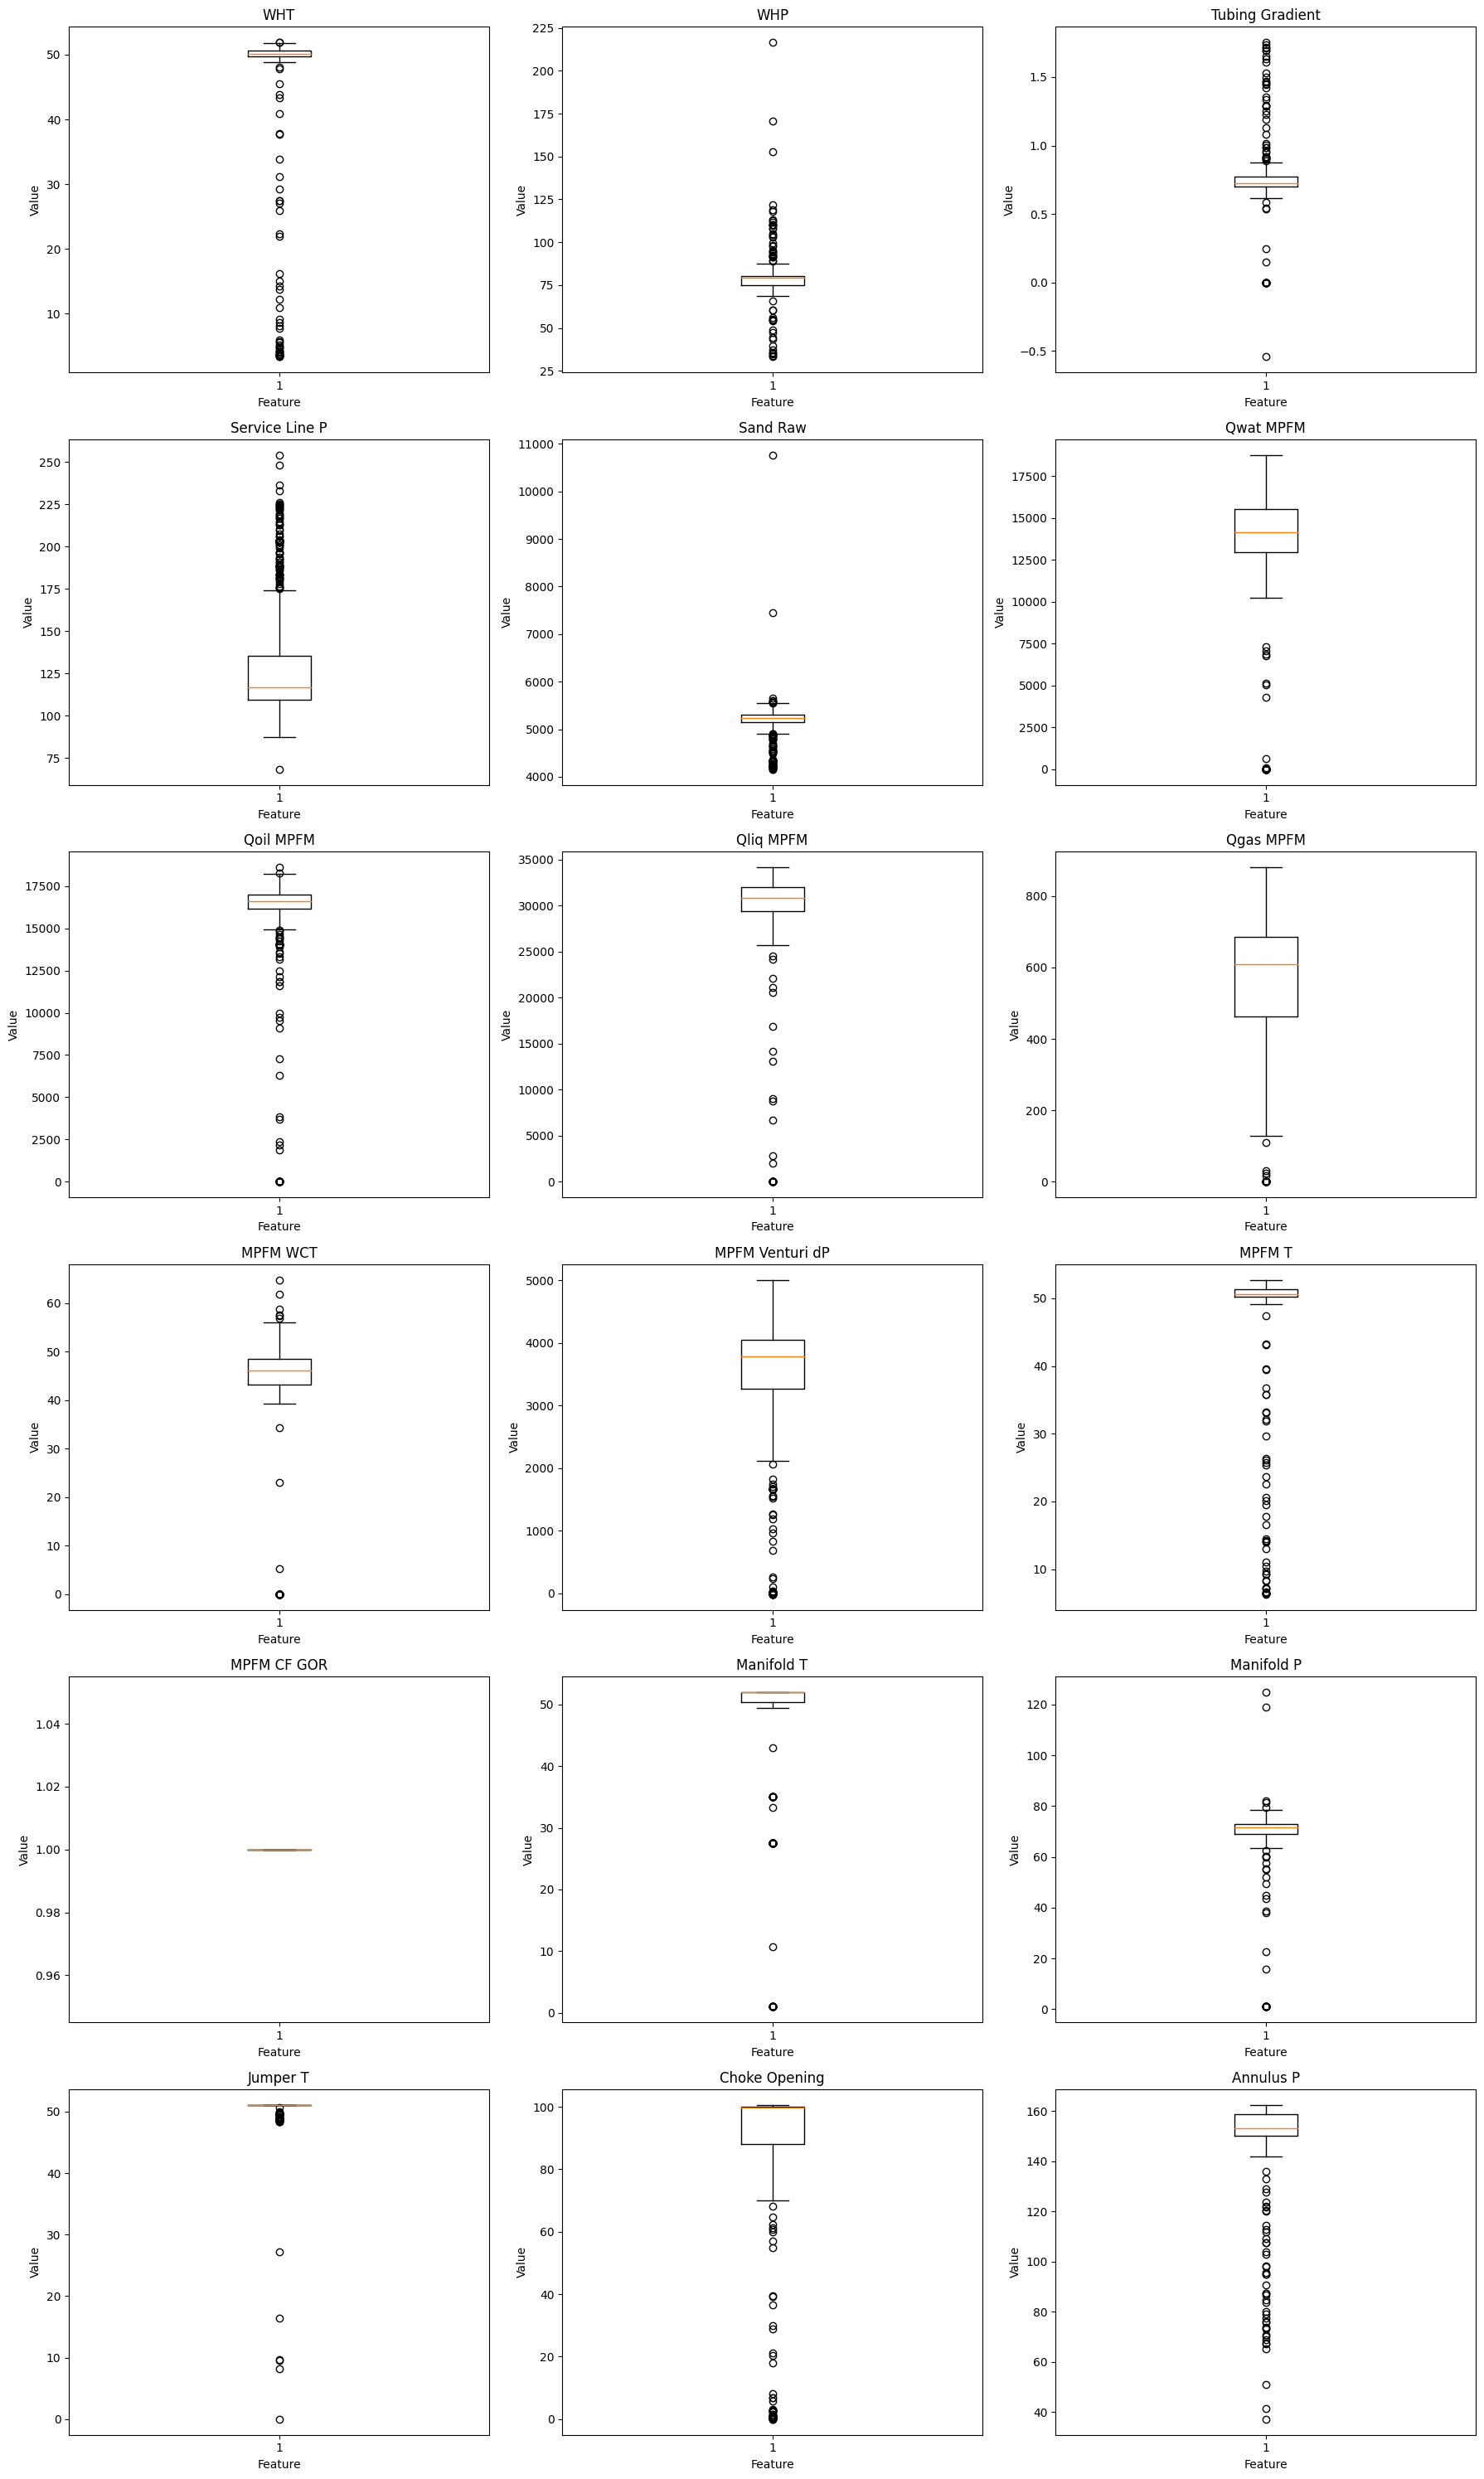

In [56]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(18, 30))

for i, col in enumerate(df_train.drop(columns='Date').columns):
    ax = axes[i // 3, i % 3]
    ax.boxplot(df_train[col])
    ax.set_title(col)
    ax.set_xlabel('Feature')
    ax.set_ylabel('Value')


plt.tight_layout()
plt.show()

##### Drop feature 'MPFM CF GOR' since its std = 0 in the train set

In [57]:
X.drop(columns='MPFM CF GOR', inplace=True)
X_train.drop(columns='MPFM CF GOR', inplace=True)
X_val.drop(columns='MPFM CF GOR', inplace=True)
X_test.drop(columns='MPFM CF GOR', inplace=True)

##### Features with many outliers and heavily skewed -> outliers might be full part of the dataset and shouldn't be removed -> MinMaxScaling

In [58]:
#Instantiate MinMaxScaler
min_max_scaler = MinMaxScaler()

#fit
min_max_scaler.fit(X)

#transform
X_scaled = min_max_scaler.transform(X)
X_train_scaled = min_max_scaler.transform(X_train)
X_val_scaled = min_max_scaler.transform(X_val)
X_test_scaled = min_max_scaler.transform(X_test)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

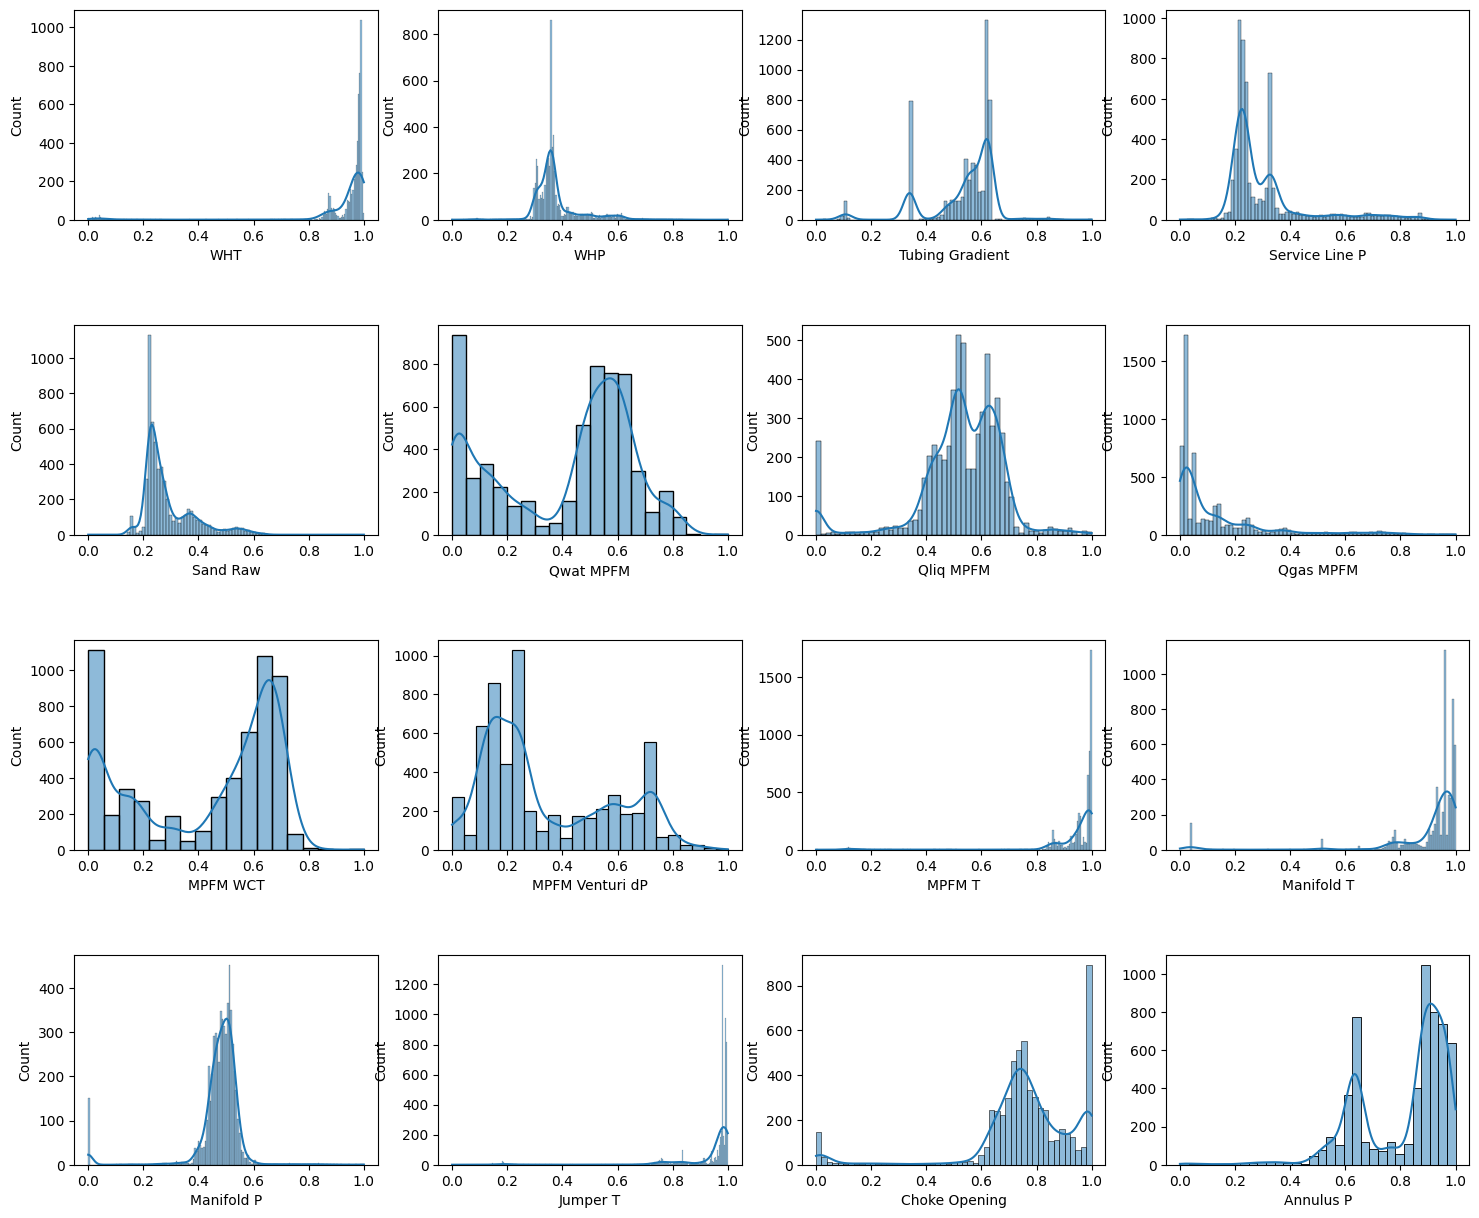

In [59]:
# Create a figure and axis for each histogram
fig, axs = plt.subplots(4, 4, figsize=(18, 15))

axs = axs.ravel()

for i, col in enumerate(X_scaled.columns):
    sns.histplot(X_scaled[col], kde=True, ax=axs[i])

for j in range(len(X_scaled.columns), len(axs)):
    axs[j].axis('off')

plt.subplots_adjust(hspace=0.5)

plt.show()

## Model

In [61]:
from sklearn.linear_model import LinearRegression

In [64]:
baseline_model = LinearRegression()
baseline_model.fit(X_train_scaled, y_train)

baseline_pred_val = baseline_model.predict(X_val_scaled)
baseline_pred_test = baseline_model.predict(X_test_scaled)
baseline_mae_val = np.mean(np.abs(baseline_pred_val - y_val), axis=0)
baseline_mae_test = np.mean(np.abs(baseline_pred_test - y_test), axis=0)

print(f'mean oil production on train set = {round(float(np.mean(y_train, axis=0)),2)} ton')
print(f'🎯 baseline MAE on val set = {round(float(baseline_mae_val),2)} ton')
print(f'🎯 baseline MAE on test set = {round(float(baseline_mae_test),2)} ton')

mean oil production on train set = 15386.35 ton
🎯 baseline MAE on val set = 1335.7 ton
🎯 baseline MAE on test set = 34.33 ton


In [69]:
baseline_model.predict(X_val_scaled)

array([16164.57380892, 16426.43232023, 16319.82247797, 16641.29996087,
       16550.15218025, 16848.99266856, 16871.78673619, 16447.30566386,
       16854.70362327, 16559.51315734, 15893.16812653, 15237.5683057 ,
       14427.93581625, 16293.88032913, 17223.63776012,  1346.90290297,
       17536.7049488 , 16827.86933405, 16860.44455745, 13904.72012704,
       13905.98799739, 13905.43657597, 16765.23152909, 17019.34969244,
       17183.63518649, 16937.92444992, 16588.370165  , 13902.33668023,
       13899.64429613, 26528.64722196, 26596.6737493 ])

In [71]:
pd.DataFrame({'Predicted': baseline_pred_val,
             'Real_value': y_val})

,Predicted,Real_value
2860,16164.573809,16152.668249
2861,16426.432320,16411.760158
2862,16319.822478,16308.252385
2863,16641.299961,16629.036189
2864,16550.152180,16534.047531
2865,16848.992669,16830.508610
2866,16871.786736,16852.423134
2867,16447.305664,16433.212851
2868,16854.703623,16839.289161
2869,16559.513157,16543.889949


In [72]:
pd.DataFrame({'Predicted_test': baseline_pred_test,
             'Real_value_test': y_test})

,Predicted_test,Real_value_test
4717,9580.676570,9613.636011
4718,10552.437013,10571.676616
4719,10170.809358,10196.247010
4720,10854.733902,10859.098011
4721,9895.400080,9928.274351
...,...,...
5808,10986.976350,10925.670806
5809,11191.640243,11142.564473
5810,11189.673227,11140.120568
5811,11452.529317,11400.139595


In [65]:
from sklearn.model_selection import cross_validate

model = LinearRegression()

cv_results = cross_validate(model, X_train_scaled, y_train, cv=5)

cv_score = cv_results['test_score'].mean()
cv_score

0.999677364354399

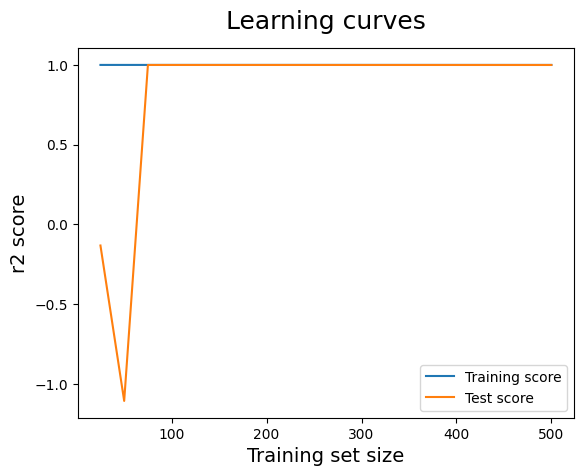

In [67]:
from sklearn.model_selection import learning_curve

train_sizes = [25,50,75,100,250,500]
# Get train scores (R2), train sizes, and validation scores using `learning_curve`
train_sizes, train_scores, test_scores = learning_curve(
    estimator=LinearRegression(), X=X_train_scaled, y=y_train, train_sizes=train_sizes, cv=5)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()

In [68]:
from sklearn.inspection import permutation_importance

#instantiate and fit the model 
model = LinearRegression().fit(X_train_scaled,y_train)

#performs permutation
permutation_score = permutation_importance(model, X_train_scaled, y_train, n_repeats = 10)

#Unstack results showing the decrease in performance after shuffling features
importance_df = pd.DataFrame(np.vstack((X_train_scaled.columns, permutation_score.importances_mean)).T)
importance_df.columns=['feature', 'score decrease']

#show important features
importance_df.sort_values(by='score decrease', ascending = False)

,feature,score decrease
6,Qliq MPFM,6.965579
5,Qwat MPFM,1.622448
8,MPFM WCT,0.001126
0,WHT,0.000163
9,MPFM Venturi dP,0.000143
7,Qgas MPFM,0.000048
12,Manifold P,0.000029
14,Choke Opening,0.000022
1,WHP,0.00002
2,Tubing Gradient,0.000018


In [ ]:
feat_permutation = list(importance_df[importance_df['score decrease']<0.005].feature)
feat_permutation

In [ ]:
X_full = X_full.drop(columns=feat_permutation)

In [ ]:
model = LinearRegression()

cv_results = cross_validate(model, X_full, y_full, cv=5)

cv_score = cv_results['test_score'].mean()
cv_score

In [ ]:
train_sizes = [25,50,75,100,250,500]
# Get train scores (R2), train sizes, and validation scores using `learning_curve`
train_sizes, train_scores, test_scores = learning_curve(
    estimator=LinearRegression(), X=X_full, y=y_full, train_sizes=train_sizes, cv=5)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()